# Forced oscillations

In [1]:
restoredefaultpath
set(0,'defaultlinelinewidth',1)
set(0,'defaultaxesfontsize',10)


ans =

    '9.7.0.1296695 (R2019b) Update 4'



In [2]:
%plot -s 800,400 -r 160 -f png

Our standard form for oscillators is

```{math}
:label: secondlin-unified-forced
x'' + 2 Z \omega_0\, x' + \omega_0^2\, x = f(t),
```

where again $\omega_0$ is the natural frequency, $Z$ is the nonnegative damping coefficient, and $f$ is a forcing function. The most important type of forcing in applications is harmonic, as exemplified by 

$$
f(t) = \cos(\omega t).
$$ 

Let's start by using a trick of linearity. Define $g(t)=\sin(\omega t)$, and suppose that $u$ solves the ODE with forcing $f(t)+i g(t)$:

$$
\opA[u] = f + i g.
$$

We should expect $z$ to be complex-valued. If we break it into real and imaginary parts, so that $u(t)=x(t)+i y(t)$, then linearity tell us that 

$$
f+i g = \opA[x+i y] = \opA[x] + i \opA[y].
$$

The only way to make these identically true is if $\opA[x]=f$ and $\opA[y]=g$. In summary, we can (1) *complexify* the original forcing $\cos(\omega t)$ to be $e^{i\omega t}$, (2) solve the ODE, and then (3) take the real part of that solution at the end to get a particular solution for the original forcing.

A justification for this roundabout procedure is that exponential forcing is by far the easiest kind to solve for. Using undetermined coefficients, we let $x_p(t)=Ae^{i\omega t}$ and insert it into the ODE with complexified forcing to get

$$
A e^{i\omega t} \bigl[ (i\omega)^2 + 2Z\omega_0(i\omega) + \omega_0^2 \bigr] = e^{i\omega t},
$$

so that

```{math}
:label: secondlin-coeff-complex
A = \frac{1}{\omega_0^2-\omega^2 + 2iZ\omega_0\omega}.
```

As we work through detailed cases below, bear in mind that none of this affects the homogeneous solution $x_h$, which has natural oscillation at natural frequency $\omega_0$ with some level of damping.

## Undamped

Things are simplest in the undamped case, $Z=0$. Then the particular solution for complexified forcing $e^{i\omega t}$ is

$$
u_p(t) = \frac{1}{\omega_0^2-\omega^2} e^{i\omega t}.
$$

The real part of this gives an $x_p$ for $f(t)=\cos(\omega t)$, which is our standard for harmonic forcing. 

(formula-secondlin-nonresonant)=

````{proof:formula} Undamped oscillator with $f(t)=\cos(\omega t)$
$$
x_p(t) = \frac{1}{\omega_0^2-\omega^2} \cos(\omega t), \qquad \omega \neq \omega_0.
$$
````

(More on the exceptional case $\omega=\omega_0$ in a moment.) The amplitude of $x_p$ grows without bound as $\omega\to \omega_0$.

The general solution is a combination of $x_h$, which oscillates at the natural frequency $\omega_0$, and $x_p$, which oscillates at the driving frequency $\omega$:

$$
x(t) = a_1 \cos(\omega_0 t) + a_2 \sin(\omega_0 t) + \frac{1}{\omega_0^2-\omega^2} \bigl[ -\cos(\omega_0 t) + \cos(\omega t)\bigr].
$$

### Beats

Things get interesting when $\omega \approx \omega_0$. Suppose the initial conditions are chosen so that the complete solution is

$$
x(t) = \frac{1}{\omega_0^2-\omega^2} \bigl[ -\cos(\omega_0 t) + \cos(\omega t)\bigr].
$$

Let's express the frequencies in terms of their average value $\hat{\omega}$ and their separation $2\epsilon$:

$$
\omega = \hat{\omega} - \epsilon, \qquad \omega_0 = \hat{\omega} + \epsilon.
$$

Some trig identity manipulation leads to

```{math}
:label: secondlin-beats
x(t) = \frac{1}{4\epsilon\hat{\omega}} \bigl[ 2 \sin(\epsilon t) \sin(\hat{\omega} t) \bigr] 
= \frac{\sin(\epsilon t)}{2\epsilon \hat{\omega}} \sin(\hat{\omega} t).
```

If $\epsilon$ is small, we can interpret this solution as an oscillation at the average frequency inside an envelope that oscillates at the much lower frequency $\epsilon$. This phenomenon is called {term}`beating` and is audible as a modulating change in volume when two instruments slightly out of tune play together. You can hear this phenomenon demonstrated in [this video](https://youtu.be/rmvDu6EY2lE?t=10), among many others.

### Resonance

{numref}`Formula {number}<formula-secondlin-nonresonant>` cannot account for the case $\omega=\omega_0$. This situation is known as {term}`resonance`. It's an idealization of pushing someone on a swing at *exactly* the right moment in each cycle.

We can obtain the resonant solution by taking the limit $\epsilon\to 0$ in {eq}`secondlin-beats`. (Alternatively, we can start from scratch and use an enhanced form of the method of undetermined coefficients.) Since $\sin(\theta)/\theta \to 1$, we get the following.

(formula-secondlin-resonant)=

````{proof:formula} Undamped oscillator at resonance
$$
x_p(t) = \frac{t}{2\omega_0} \sin(\omega_0 t).
$$
````

We see that the amplitude of oscillations grows linearly forever. This physically impossible situation will be ruled out when we put some damping back into the system.

## Damped

We now turn to the physically realistic situation of $Z>0$. First, recall that the complete solution is a sum of $x_h$ and $x_p$. With nonzero damping, $x_h(t)\to 0$ exponentially as $t\to\infty$, and this is often called the **transient** part of the solution as a result. It matters in the sense of satisfying initial conditions, but has no effect on the long-term or **steady** behavior. That is entirely due to the real part of $u_p= A \exp(i \omega t)$, with $A$ defined in {eq}`secondlin-coeff-complex`. 

To soften up the notation a bit, we define the frequency ratio $\rho$ as

$$
\rho = \frac{\omega}{\omega_0}.
$$

Then the coefficient $A$ is

$$
A = \frac{1}{\omega_0^2} \cdot \frac{1}{1-\rho^2 + 2i\rho Z}.
$$

Taking the modulus of $A$ gives a quantity called the {term}`gain`,

$$
g(\rho) = \frac{1}{\rule{0pt}{1em} \omega_0^2 \sqrt{\rule{0pt}{0.8em}(1-\rho^2)^2 + 4\rho^2 Z^2 } }.
$$

The gain is the ratio of the amplitudes of the particular solution and the forcing. i.e., the factor by which the forcing is amplified in the response. 

The particular or steady solution in modified amplitude-phase form is

$$
x_p(t) = g(\rho) \cos\bigl(\omega t + \theta(\rho)\bigr),
$$

with the phase $\theta$ determined by the polar angle of $A$.

### Pseudoresonance 

A little calculus shows that as a function of $\rho$, the gain is maximized at

```{math}
:label: secondlin-rhomax
\rho_\text{max} = \begin{cases} 
\sqrt{1-2Z^2}, & \text{ if } 0 < Z^2 < \frac{1}{2},\\ 0, & \text{ if } \frac{1}{2} \le Z^2.
\end{cases}
```

When $0 < Z^2 < 1/2$, this value satisfies $0 < \rho_\text{max}<1$, i.e., the gain is maximized at a nonzero forcing frequency smaller than the natural frequency. We can consider this to be a {term}`pseudoresonance`.[^pseudo] The peak value of the gain at pseudoresonance is found to be

[^pseudo]: Since pure resonance cannot be observed in real physical systems, one usually refers to pseudoresonance as simply resonance in practice.

```{math}
:label: secondlin-gainmax
g_\text{max} = g(\rho_\text{max}) = \frac{1}{2Z\omega_0^2\sqrt{1-Z^2}}.
```

The gain remains finite for all $\rho$ when $Z>0$, but it becomes proportional to $1/Z$ as $Z\to 0$. The following graph shows the gain as a function of the damping $Z$ and forcing frequency $\omega$ when $\omega_0=1$. The white curve shows the path of pseudoresonance.

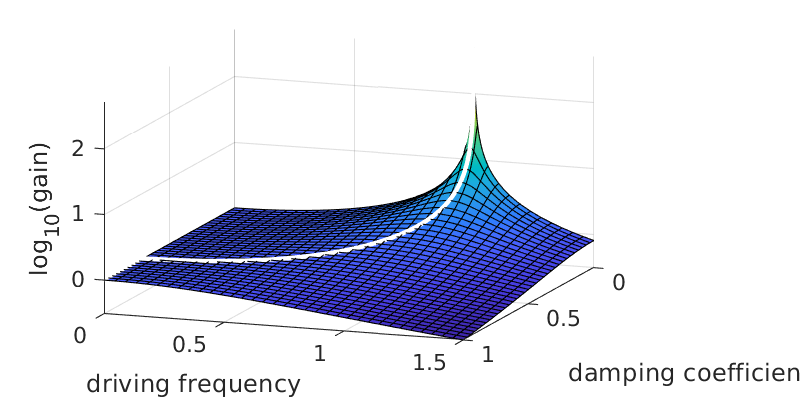

In [3]:
A = @(omega,Z) 1./(-omega.^2 + 2i*Z.*omega + 1);
log_g = @(omega,Z) log10(abs(A(omega,Z)));
fsurf( log_g,[0 1.5 1e-3 1])
set(gca,'ydir','rev')
view(20,20)
xlabel('driving frequency')
ylabel('damping coefficient')
zlabel('log_{10}(gain)')
hold on
Z = linspace(1e-3,1,300);
rhomax = real(sqrt(1-2*Z.^2));
plot3(rhomax,Z,1e-2+log_g(rhomax,Z),'w','linew',2)

Here's a short video showing how the gain of an oscillator varies with the forcing frequency $\omega$. (I use the term "eigenvalues" to mean characteristic values here.) 

<div>
<iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2358381/sp/235838100/embedIframeJs/uiconf_id/43030021/partner_id/2358381?iframeembed=true&playerId=kaltura_player&entry_id=1_izrey0ty&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=1_s72ikzpz" width="400" height="285" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player"></iframe>
</div>


<div style="max-width:608px"><div style="position:relative;padding-bottom:66.118421052632%"><iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2358381/sp/235838100/embedIframeJs/uiconf_id/43030021/partner_id/2358381?iframeembed=true&playerId=kaltura_player&entry_id=1_gqgsjn37&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=1_3nv8hl6e" width="608" height="402" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player" style="position:absolute;top:0;left:0;width:100%;height:100%"></iframe></div></div>